# Modeling and Simulation of Parallel and Distributed Systems (MSPDS 2016)

__Conclusion__: _Although results are great, it is highly dependent on the choice of "alphas". Thus, I don't consider this approach as a solution._

In [1]:
## Matplotlib configuration
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import RidgeCV, LinearRegression
from lib import DataFrameBuilder
from lib import Humanizer, Plotter, Model, OneManyModel, TwoMeanModel
from mynotebook import *

df_builder = DataFrameBuilder()

## Wikipedia Application

### Target

,input size (GiB),workers,outliers,samples,available
0,45,4,0,30,30
1,45,8,3,30,27
2,45,16,1,30,29
3,45,32,0,30,30
4,45,64,7,30,23


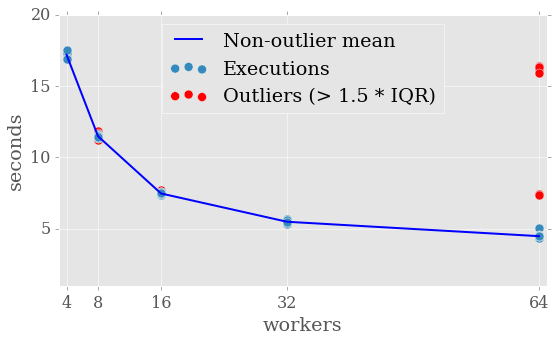

Total target application duration using the complete dataset (45 GB).


In [2]:
target_out = df_builder.get_target_df(stage=1)
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
plotter = Plotter((3, 65), (0, 20), loc='upper center')
caption = 'Total target application duration using the complete dataset (45 GB).'
target = process_outliers(target_out, humanizer, plotter, caption)

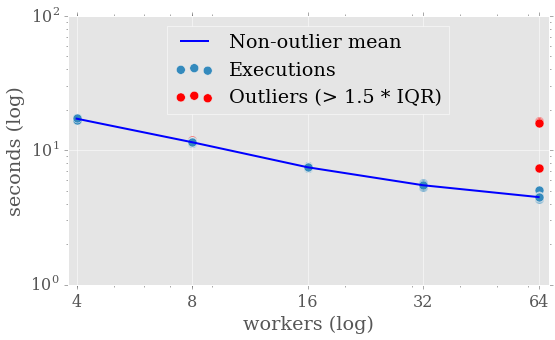

The same as above in log-log scale.


In [3]:
plotter = Plotter((3.8, 68), (1, 100), logx=True, logy=True, loc='upper center')
plotter.plot_outliers(target_out)
print('The same as above in log-log scale.')

### "Reduce" stage

In [44]:
prof_one_first_out, prof_one_nonfirst_out = df_builder.get_1VM_tasks_df(stage=1, threads=2)
prof_one_first_out = prof_one_first_out[prof_one_first_out.input < 1000 * 1024**2]
prof_one_nonfirst_out = prof_one_nonfirst_out[prof_one_nonfirst_out.input < 1000 * 1024**2]

,input size (MiB),workers,outliers,samples,available
0,128,1,1,20,19
1,256,1,3,20,17
2,512,1,0,20,20


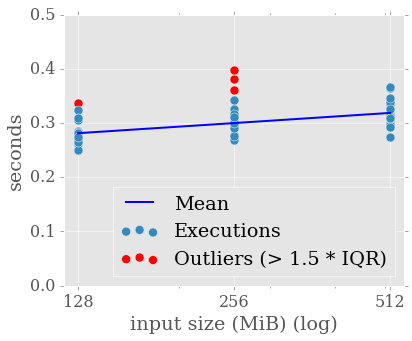

Durations of the first tasks in each thread in one VM.


In [45]:
caption = 'Durations of the first tasks in each thread in one VM.'
humanizer = Humanizer(size=Humanizer.SIZE_MIB)
plotter = Plotter((120, 545), (0, 0.5), logx=True, figsize=(6, 5), loc='lower right')
prof_one_first = process_outliers(prof_one_first_out, humanizer, plotter, caption)

In [46]:
prof = prof_one_first

display(prof.sample(3))
model = Model(RidgeCV(normalize=True, alphas=(1.25,)), features=['input'], ycol='ms', use_log=False)
display(model.fit_score(prof))
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_one_first = model

,workers,input,ms
18,1,134217465,266
10,1,134217465,307
6,1,134217465,251


[0.06106298726571957,
 ((1, 134217465), 0.07166897530764932),
 ((1, 268425644), 0.04911141724340364),
 ((1, 536816741), 0.06114613314485486)]

288.06021357796749

array([  3.99238046e-08])

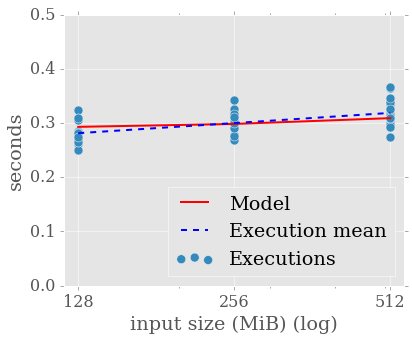

In [47]:
model = model_one_first
prof = prof_one_first

plotter = Plotter((120, 545), (0, 0.5), logx=True, figsize=(6, 5), loc='lower right')
plotter.plot_model(model, prof)

,input size (MiB),workers,outliers,samples,available
0,128,1,70,1980,1910
1,256,1,82,1980,1898
2,512,1,48,1980,1932


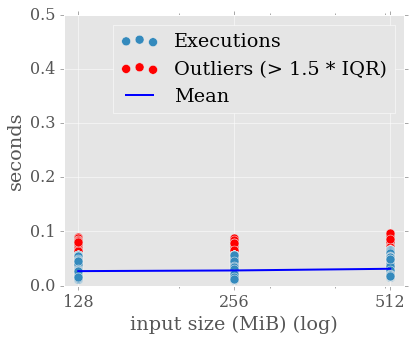

Durations of non-first tasks in each thread in one VM.


In [48]:
caption = 'Durations of non-first tasks in each thread in one VM.'
plotter = Plotter((120, 545), (0, 0.5), logx=True, figsize=(6, 5))
prof_one_nonfirst = process_outliers(prof_one_nonfirst_out, humanizer, plotter, caption)

In [49]:
prof = prof_one_nonfirst

display(prof.sample(3))
model = Model(RidgeCV(normalize=True, alphas=(0.22,)), features=['input'], ycol='ms', use_log=False)
display(model.fit_score(prof))
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_one_nonfirst = model

,workers,input,ms
5284,1,536816741,23
5521,1,536816741,25
4266,1,536816741,23


[0.3333978136554028,
 ((1, 134217465), 0.3332115198616359),
 ((1, 268425644), 0.3283559072550049),
 ((1, 536816741), 0.3385351632899969)]

25.745408568180956

array([  8.91554999e-09])

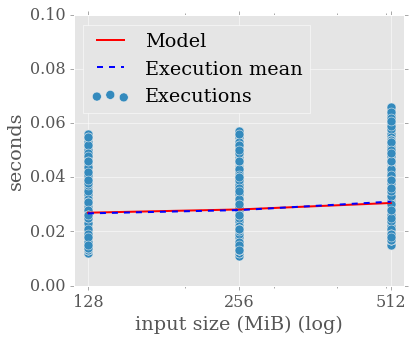

In [50]:
model = model_one_nonfirst
prof = prof_one_nonfirst

plotter = Plotter((120, 545), (0, 0.10), logx=True, figsize=(6, 5), loc='upper left')
plotter.plot_model(model, prof)

In [51]:
caption = 'Durations of the first tasks using 1-GB input data.'
prof_many_first_out, prof_many_nonfirst_out = df_builder.get_strong_scaling_tasks_df(2, stage=1, threads=2)

,input size (MiB),workers,outliers,samples,available
0,1024,1,2,20,18
1,1024,2,1,40,39
2,1024,3,2,60,58


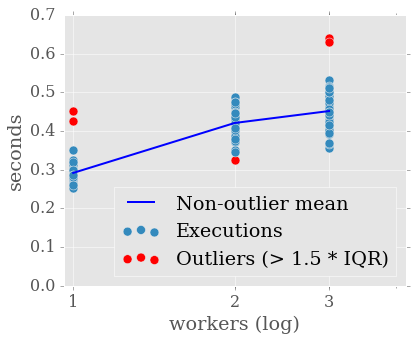

Durations of the first tasks using 1-GB input data.


In [52]:
humanizer = Humanizer(size=Humanizer.SIZE_MIB)
plotter = Plotter((0.96, 4.17), (0, 0.7), logx=True, logy=False, loc='lower right', figsize=(6, 5))
prof_many_first = process_outliers(prof_many_first_out, humanizer, plotter, caption)

In [53]:
prof = prof_many_first

display(prof.sample(3))
model = Model(RidgeCV(normalize=True, alphas=(3.8,)), features=['workers'], ycol='ms', use_log=False)
display(model.fit_score(prof))
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_many_first = model

,workers,input,ms
108,3,1073741798,490
67,3,1073741798,477
76,3,1073741798,440


[0.1266377840023846,
 ((1, 1073741798), 0.3707132113139744),
 ((2, 1073741798), 0.06850175383773593),
 ((3, 1073741798), 0.08998170615432745)]

382.24313573255392

array([ 14.44459034])

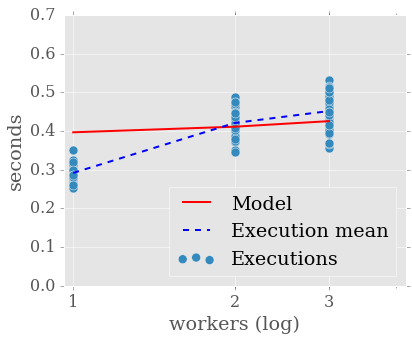

In [54]:
model = model_many_first
prof = prof_many_first

plotter = Plotter((0.96, 4.17), (0, 0.7), logx=True, logy=False, loc='lower right', figsize=(6, 5))
plotter.plot_model(model, prof)

,input size (MiB),workers,outliers,samples,available
0,1024,1,73,1980,1907
1,1024,2,23,1960,1937
2,1024,3,32,1940,1908


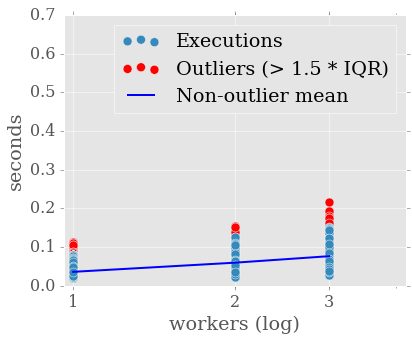

Durations of the non-first tasks using 1-GB input data.


In [55]:
caption = 'Durations of the non-first tasks using 1-GB input data.'
plotter = Plotter((0.96, 4.17), (0, 0.7), logx=True, logy=False, figsize=(6, 5))
prof_many_nonfirst = process_outliers(prof_many_nonfirst_out, humanizer, plotter, caption)

In [56]:
prof = prof_many_nonfirst

model = Model(RidgeCV(normalize=True, alphas=(2.25,)), features=['workers'], ycol='ms', use_log=True)
model.fit_score(prof)
linreg = model.get_linreg()
display(linreg.intercept_, linreg.coef_)

model_many_nonfirst = model

5.4786277783753743

array([ 0.21842202])

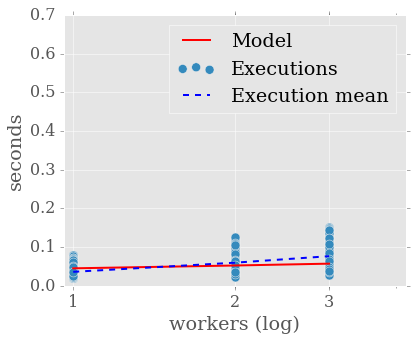

In [57]:
model = model_many_nonfirst
prof = prof_many_nonfirst

plotter = Plotter((0.96, 4.17), (0, 0.7), logx=True, logy=False, figsize=(6, 5))
plotter.plot_model(model, prof)

In [58]:
model_first = OneManyModel(model_one_first, model_many_first)
model_nonfirst = OneManyModel(model_one_nonfirst, model_many_nonfirst)
model_stage = TwoMeanModel(model_first, model_nonfirst, 2, tasks=200)

In [59]:
target_first_out, target_nonfirst_out = df_builder.get_target_tasks_df(stage=1, threads=2)

,input size (GiB),workers,outliers,samples,available
0,45,4,0,240,240
1,45,8,25,480,455
2,45,16,60,960,900
3,45,32,35,1920,1885
4,45,64,212,3840,3628


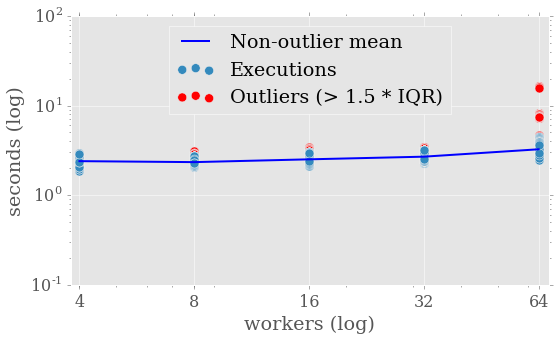

teste


In [60]:
plotter = Plotter((3.8, 68), (0.1, 100), logx=True, logy=True, loc='upper center')
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
target_first = process_outliers(target_first_out, humanizer, plotter, 'teste')

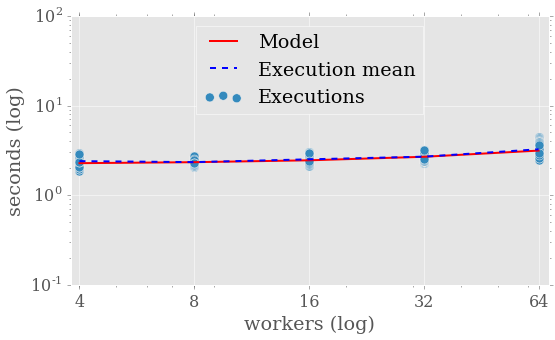

In [61]:
plotter = Plotter((3.8, 68), (0.1, 100), logx=True, logy=True, loc='upper center')
plotter.plot_model(model_first, target_first)

,input size (GiB),workers,outliers,samples,available
0,45,4,42,5760,5718
1,45,8,6,5520,5514
2,45,16,26,5040,5014
3,45,32,9,4080,4071
4,45,64,177,2160,1983


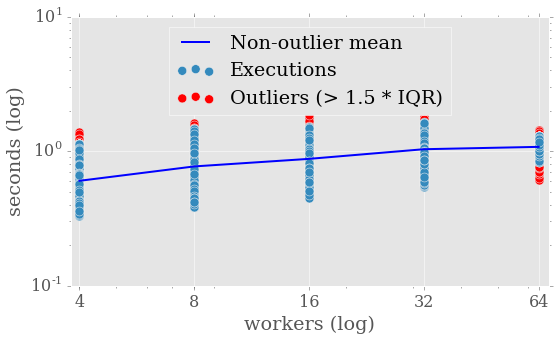

teste


In [62]:
plotter = Plotter((3.8, 68), (0.1, 10), logx=True, logy=True, loc='upper center')
#plotter = Plotter((3.8, 68), (0, 2), logx=True, logy=False, loc='upper center')
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
target_nonfirst = process_outliers(target_nonfirst_out, humanizer, plotter, 'teste')
#plotter = Plotter((3, 65), (1, 20), loc='upper center')
#plotter.plot_model(model_first, target_first)

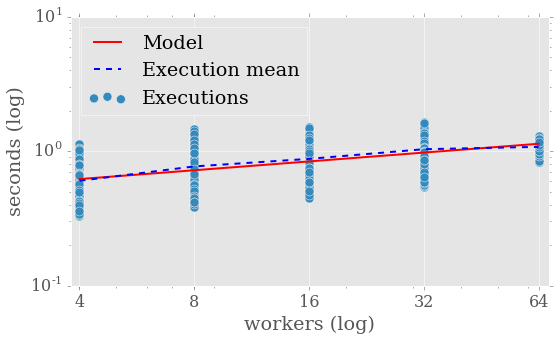

In [63]:
plotter = Plotter((3.8, 68), (0.1, 10), logx=True, logy=True, loc='upper left')
plotter.plot_model(model_nonfirst, target_nonfirst)

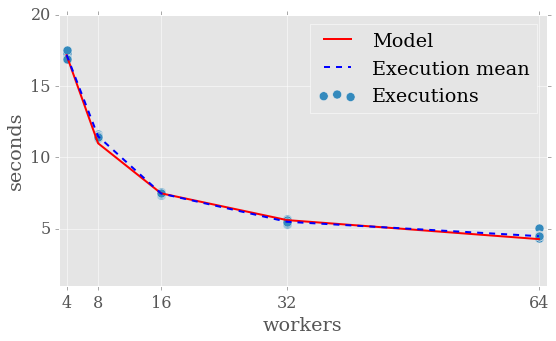

In [85]:
plotter = Plotter((3, 65), (1, 20), loc='upper right')
plotter.plot_model(model_stage, target)

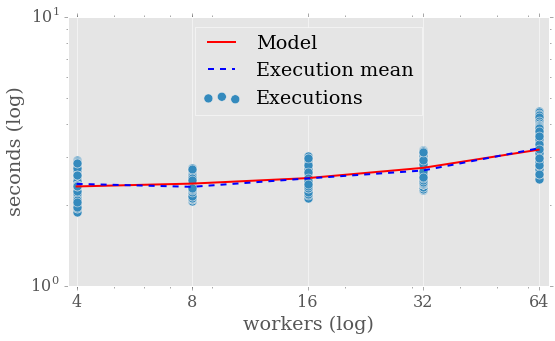

2281.2983481437595

array([ 14.43441454])

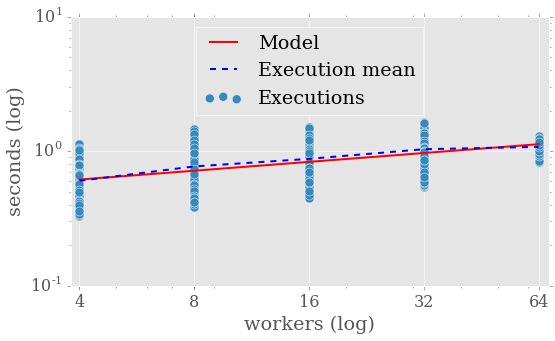

8.8285783180226982

array([ 0.21872041])

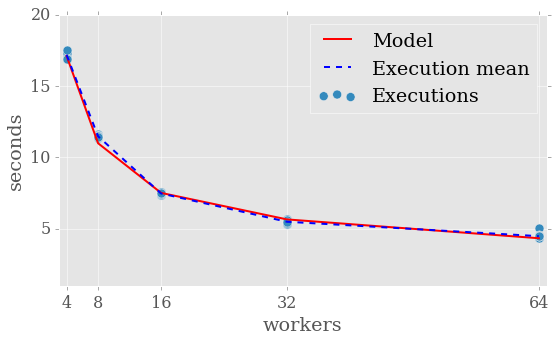

In [84]:
_model_first = Model(RidgeCV(normalize=True), features=['workers'], use_log=False)
_model_nonfirst = Model(RidgeCV(normalize=True), features=['workers'], use_log=True)

_model_first.fit(target_first)
_model_nonfirst.fit(target_nonfirst)

plotter = Plotter((3.8, 68), (1, 10), logx=True, logy=True, loc='upper center')
plotter.plot_model(_model_first, target_first)
linreg = _model_first.get_linreg()
display(linreg.intercept_, linreg.coef_)

plotter = Plotter((3.8, 68), (0.1, 10), logx=True, logy=True, loc='upper center')
plotter.plot_model(_model_nonfirst, target_nonfirst)
linreg = _model_nonfirst.get_linreg()
display(linreg.intercept_, linreg.coef_)

_model_stage = TwoMeanModel(_model_first, _model_nonfirst, 2, tasks=200)
plotter = Plotter((3, 65), (1, 20), loc='upper right')
plotter.plot_model(_model_stage, target)